In [1]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import pandas as pd, numpy as np
import matplotlib as mpl
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
import joblib
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, roc_curve,precision_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from imblearn.ensemble import RUSBoostClassifier,BalancedRandomForestClassifier #63 84
from imblearn.ensemble import BalancedBaggingClassifier #69 74
from sklearn.metrics import make_scorer, f1_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, RUSBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import OneSidedSelection
from collections import Counter
from imblearn.combine import SMOTEENN
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTEN
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import StratifiedKFold
import shap
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder


In [2]:
# mpl.rcParams['font.sans-serif']=['SimHei']
# mpl.rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']


In [3]:
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/V2/csv/2017-全国科技工作者-Item-共同特征数据.csv"
Dataset = pd.read_csv(fpath)
# corr_matrix = Dataset.corr()

# sns.heatmap(corr_matrix, annot=True)


重采样后的类别分布： Counter({2: 5084, 1: 4755, 0: 2865})
预测数据: Counter({0: 3291, 1: 613, 2: 82})
              precision    recall  f1-score   support

           0       0.88      0.62      0.72      3291
           1       0.20      0.44      0.28       613
           2       0.09      0.38      0.14        82

    accuracy                           0.58      3986
   macro avg       0.39      0.48      0.38      3986
weighted avg       0.76      0.58      0.64      3986

Recall: 0.58 Accuracy: 58.48


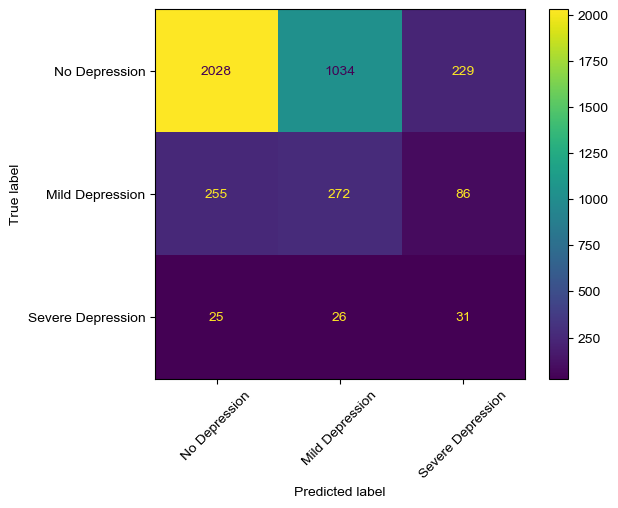

F1:  0.6440992005383829
{'fit_time': array([1.28734279, 1.37820387, 1.41990614, 1.42462492, 1.50619864]), 'score_time': array([0.00718021, 0.00901008, 0.00833488, 0.00883889, 0.01162219]), 'test_accuracy': array([0.74104683, 0.86619441, 0.86068477, 0.85360094, 0.85944882]), 'test_precision': array([nan, nan, nan, nan, nan]), 'test_recall': array([nan, nan, nan, nan, nan]), 'test_f1': array([nan, nan, nan, nan, nan])}


In [22]:
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/V2/csv/2017-全国科技工作者-Item-共同特征数据.csv"
data = pd.read_csv(fpath)
random_state=42
y = data['depression']
x = data.drop(labels=['depression','anxiety'], axis=1)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)

# 过采样
smote = SMOTEENN(random_state=random_state)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
print("重采样后的类别分布：", Counter(y_train_resampled))
weights = np.sum(y_train == 0) / np.sum(y_train == 2)

# brfc = RandomForestClassifier(random_state=random_state, n_estimators=100)
brfc = xgb.XGBClassifier(learning_rate=0.05,objective='multi:softmax', num_class=3)

brfc.fit(x_train_resampled, y_train_resampled)
y_pred = brfc.predict(x_test)

print("预测数据:", Counter(y_test))
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Recall: %.2f' % recall,'Accuracy: %.2f' % (accuracy*100))
# 绘制混淆矩阵
label_dict = {
    0: 'No Depression',
    1: 'Mild Depression',
    2: 'Severe Depression'
}

y_test_text = [label_dict[label] for label in y_test]
y_pred_text = [label_dict[label] for label in y_pred]
cm_text = confusion_matrix(y_test_text, y_pred_text, labels=list(label_dict.values()))

disp_text = ConfusionMatrixDisplay(confusion_matrix=cm_text, display_labels=list(label_dict.values()))
disp_text.plot()
plt.xticks(rotation=45)
plt.show()

print('F1: ', f1)
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Perform 5-fold cross-validation on the model

cv_results = cross_validate(brfc,x_train_resampled, y_train_resampled, cv=5, scoring=scoring)
print(cv_results)
# Print the average score for each metric
# print("Accuracy: ", cv_results['test_accuracy'].mean())
# print("Precision: ", cv_results['test_precision'].mean())
# print("Recall: ", cv_results['test_recall'].mean())
# print("F1 score: ", cv_results['test_f1'].mean())




预测数据: Counter({1: 2022, 0: 1964})
              precision    recall  f1-score   support

           0       0.71      0.66      0.68      1964
           1       0.69      0.73      0.71      2022

    accuracy                           0.70      3986
   macro avg       0.70      0.70      0.70      3986
weighted avg       0.70      0.70      0.70      3986

Recall: 0.70 Accuracy: 69.69


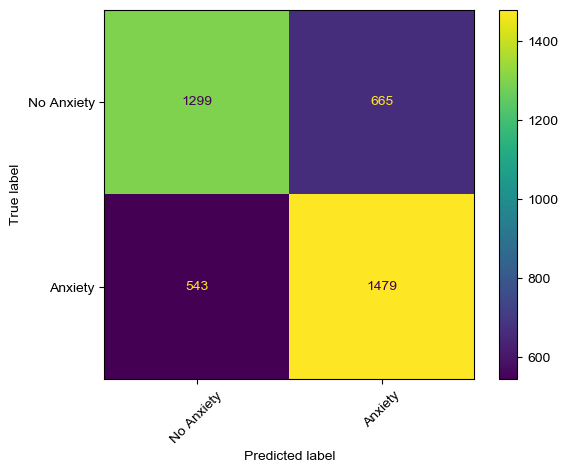

F1:  0.6965195537227166


In [21]:
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/V2/csv/2017-全国科技工作者-Item-共同特征数据.csv"
Dataset = pd.read_csv(fpath)
random_state=42
y = Dataset['anxiety']
x = Dataset.drop(labels=['depression','anxiety'], axis=1)

# num_cols = ["WorkingS", "NumberCH","BMI","Age","Yincome"]
# all_columns = list(data.columns)

# # 选择需要的列
# class_columns = [col for col in all_columns if col not in num_cols]
# one_hot = OneHotEncoder(handle_unknown="ignore")
# one_hot.fit(data[class_columns])
# cat_features = one_hot.transform(data[class_columns]).toarray()

# # 将连续特征进行标准化
# scaler = StandardScaler()
# scaler.fit(data[num_cols])
# num_features = scaler.transform(data[num_cols])

# # 合并离散特征和连续特征
# features = np.concatenate((cat_features, num_features), axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)

# brfc = RandomForestClassifier(max_depth=20,n_estimators=200, random_state=random_state,min_samples_split=2)
brfc = xgb.XGBClassifier(n_estimators=200,scale_pos_weight=1,learning_rate=0.02)
# brfc = SVC()
brfc.fit(x_train, y_train)
y_pred = brfc.predict(x_test)

print("预测数据:", Counter(y_test))
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Recall: %.2f' % recall,'Accuracy: %.2f' % (accuracy*100))
# 绘制混淆矩阵
label_dict = {
    0: 'No Anxiety',
    1: 'Anxiety'
}

y_test_text = [label_dict[label] for label in y_test]
y_pred_text = [label_dict[label] for label in y_pred]
cm_text = confusion_matrix(y_test_text, y_pred_text, labels=list(label_dict.values()))

disp_text = ConfusionMatrixDisplay(confusion_matrix=cm_text, display_labels=list(label_dict.values()))
disp_text.plot()
plt.xticks(rotation=45)
plt.show()
print('F1: ', f1)
# scoring = ['accuracy', 'precision', 'recall', 'f1']

# # Perform 5-fold cross-validation on the model

# cv_results = cross_validate(brfc,x_train_resampled, y_train_resampled, cv=5, scoring=scoring)

# # Print the average score for each metric
# print("Accuracy: ", cv_results['test_accuracy'].mean())
# print("Precision: ", cv_results['test_precision'].mean())
# print("Recall: ", cv_results['test_recall'].mean())
# print("F1 score: ", cv_results['test_f1'].mean())


